# TASK 3: Exploring Unsupervised Learning - kMeans Clustering

## Problem statement:
From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

### Importing the required libraries

In [1]:
import numpy as np                                          # for linear algebra 
import pandas as pd                                         # for using dataframes
import matplotlib.pyplot as plt                             # for visualising data
from sklearn.cluster import KMeans                          # for performing kMeans clustering

### Importing the dataset

In [2]:
data = pd.read_csv("Iris.csv")       # importing csv from url   
data.head()                          # to view a sample from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring the dataset

In [3]:
data.dtypes      # datatypes in the dataset

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
data.describe()     # an outline of various measures for the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isnull().sum()    # to check for null values, if any

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Finding optimum k for kMeans algorithm

Elbow method: This calculates the Within-Cluster-Sum-of-Squared Errors (WCSSE) for different values of k, and chooses the k from which it starts to reduce. In the plot of WCSSE vs k, this appears as an elbow 

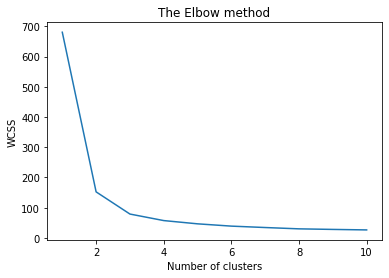

In [6]:
X = data[data.columns[1:5]].values     # the data to be learnt from

WCSSE = []                            # Within-Cluster-Sum-of-Squared Errors 
kmax = 10                             # maximum k value

for k in range(1, kmax+1):            # computing WCSSE
    kmeans = KMeans(n_clusters = k).fit(X)            
    WCSSE.append(kmeans.inertia_)

plt.plot(range(1, kmax+1), WCSSE)     # plot the graph
plt.title('The Elbow method')         # title of graph  
plt.xlabel('Number of clusters')      # x-axis
plt.ylabel('WCSS')                    # y-axis
plt.show()                            # display the graph

From the above graph, it is evident that <b>k = 3</b> is the optimum value.

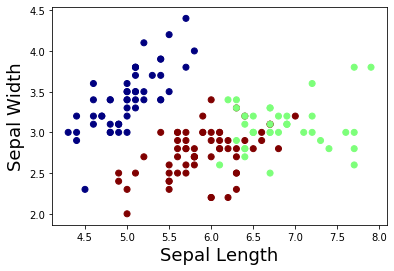

In [7]:
# clusters predicted by kMeans based on sepals

labels = KMeans(n_clusters = 3).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = labels, cmap = 'jet')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

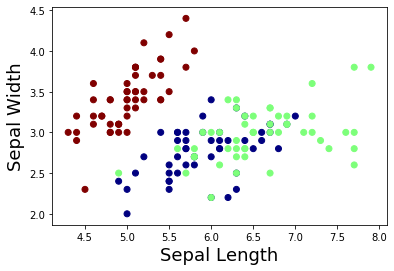

In [8]:
# actual clusters based on sepals

d = dict(zip(list(set(data['Species'])),[1,2,3]))
lab_act = [d[i] for i in data["Species"]]
plt.scatter(X[:,0], X[:,1], c = lab_act, cmap = 'jet')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

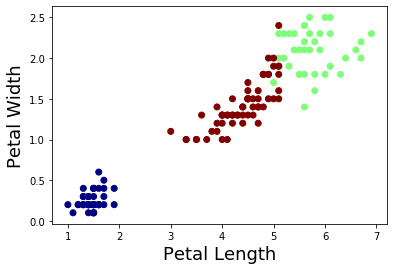

In [9]:
# clusters predicted by kMeans based on petals

plt.scatter(X[:,2], X[:,3], c = labels, cmap = 'jet')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()

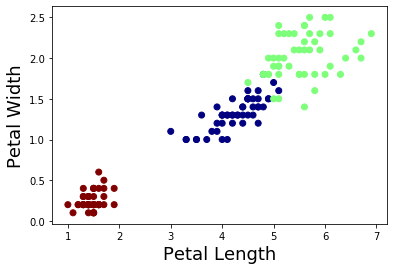

In [10]:
# actual clusters based on petals

plt.scatter(X[:,2], X[:,3], c = lab_act, cmap = 'jet')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()